---
# Programmieren und Rechnernutzung: Grundlagen und Anwendungen der statistischen Datenanalyse 
**Institut für Experimentelle Teilchenphysik** <br>
Prof. G. Quast <br>
Dr. Th. Chwalek<br>
[Ilias Seite zum Kurs](https://ilias.studium.kit.edu/ilias.php?baseClass=ilrepositorygui&ref_id=2478103) <br>
WS 2024/25 – Blatt 02 <br>
Abgabe: Phase 1: 18.11. bzw. 19.11., Phase 2: 25.11. bzw. 26.11.

---

Gemäß der Abfolge des Stoffs in der Vorlesung üben Sie auf dem zweiten Blatt den Umgang mit Monte-Carlo-(MC)Methoden und die Erstellung von Monte-Carlo-Simulationen. Die MC-Simulationen sind ein wesentlicher Bestandteil der modernen Physik und kommen in jedem Fachgebiet zum Einsatz – immer dann wenn es nicht möglich oder ineffiezient ist, ein Problem mit vielen gekoppelten Freiheitsgraden analytisch oder mit anderen numerischen Methoden zu lösen. Beispiele für solche Probleme sind über die in der Vorlesung hinaus erwähnten Anwendungsfällen z.B. die Faltung von Proteinen, die Entwicklung von Galaxien oder Teilchenkollisionen
in einem Teilchenbeschleuniger. <br>

### Erinnerung: Grundsätzliches Verfahren der Monte Carlo Methoden
1. Erzeuge Folge von Zufallszahlen $r_1, r_2, \dots, r_m$, gleichverteilt in $[0,1[$.
2. Transformiere diese Foge zur Erzeugung einer anderen Sequenz $x_1, x_2, \dots, x_n$, die
   einer beliebigen anderen Verteilugsdichte $f(x)$ folgen. (Anmerkung: $x, x_i$ können auch Vektoren sein.)
3. Aus den $x_i$ werden dann Eigenschaften von $f(x)$ bestimmt. Zum Beispiel entspricht der Anteil der $x_i$ mit $a\leq x_i\leq b$ näherungsweise dem Integral $\int_{a}^{b}f(x)\mathrm{d}x$.

---
# Aufgabe 1: Verwerfungsmethode <a id="Aufgabe1"></a>
---

Im ersten Aufgabenteil beschäftigen Sie sich mit einem einfachen Verfahren zur Erzeugung einer gewünschten Sequenz $x_1, x_2, \dots, x_n$ aus gleichverteilten Zufallszahlen, der **Verwerfungsmethode**. In der Vorlesung haben Sie bereits das wohl bekannteste Beispiel, die Berechnung der Kreiszahl $\pi$, kennengelernt. In dem Beispiel werden Zufallszahlen $(r_1,r_2)$ gleichmäßig in der Einheitsfläche erzeugt (durch *np.random.random(size=2)*) und dann mithilfe der Bedingung, dass das Zufallszahlenpaar innerhalb des Einheitskreises liegt ($r_1^2+r_1^2\leq 1^2$), die Kreiszahl $\pi$ approximiert.

Mit Hilfe der Verwerfungsmethode können recht einfach auch hochdimensionale, bestimmte Integrale nährungsweise numerisch berechnet werden. In dieser Aufgabe sollen Sie die Methodik des Beispiels nutzen, um das Volumen $V_d$ von $d$-dimensionalen Kugeln in Abhängikeit von der Anzahl der Dimensionen $d$ zu berechnen.

## a) Berechnung der Einheitsvolumen
Berechnen Sie für $d\in[1,10]$ jeweils das Volumen der $d$-dimensionalen Einheitskugel. 

Erzeugen Sie hierfür für jeden Schritt 10'000 Zufallszahlen gleichverteilt im entsprechenden $d$-dimensionalen Einheits-Hyperwürfel. Berechnen Sie mithilfe einer geeigneten Bedingung das Volumen des eingeschlossenen Kugelsegments im Einheits-Hyperwürfel und anschließend das volle Volumen der $d$-dimensionalen Einheitskugel.

> Hinweis: Vergewissern Sie sich, welche *NumPy* Methode in [*np.random*](https://numpy.org/doc/stable/reference/random/legacy.html#simple-random-data) hier nützlich sein kann.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [69]:
# set dimensions
dmax = 10  # maximum
dim = np.arange(1., dmax+1, dtype=int)  # dimensions

In [70]:
def norm(x):
    return np.sqrt(np.sum(x**2))

def in_hypersphere(x):
    return norm(x) < 1

In [75]:
# implement MC method
npoints = 10000     # number of d-dimensional points to test

np.random.seed(0)

for dimension in dim:
    random_numbers = np.random.rand(npoints, dimension)
    
    vectors_in_hypersphere = 0
    
    for i in random_numbers.T[dimension]:
        if in_hypersphere(i):
            vectors_in_hypersphere += 1
            
    vectors_in_hypersphere *= np.math.factorial(dimension)
    hypervolume = vectors_in_hypersphere/npoints
    print(f'Hypervolume: {hypervolume:.4f} for dimension {dimension}')


Vmc = []            # array holding results


IndexError: index 1 is out of bounds for axis 0 with size 1

In [80]:
random_numbers

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       ...,
       [0.75842952],
       [0.02378743],
       [0.81357508]])

## b) Abschätzung der statistischen Unsicherheit und Darstellung des Ergebnisses

Bestimmen Sie die statistische Unsicherheit $\sigma_{V_d}$ der Ergebnisse. Nutzen Sie dazu aus, dass bei $N$ Versuchen die Anzahl $N_{in}$ der innerhalb der Kugel liegenden Punkte einer Binomialverteilung $P(N_{in};p,N)$ folgt. Die Unsicherheit ergibt sich aus der Varianz der gemessenen Größe $\sigma^2=Var[\hat{p}]$, sowie der Varianz unserer binomialverteilten Zufallsvariable $N_{in}$ und der Näherung $p\simeq\hat{p}=\frac{N_{in}}{N}$.

> Hinweis: Konstanten können aus der Varianz $Var[x]$ herausgezogen werden, siehe dazu [Rechenregeln der Varianz](https://de.wikipedia.org/wiki/Varianz_(Stochastik)#Lineare_Transformation).
>
> Die Varianz einer binomialverteilten Zufallsvariable haben Sie auf dem ersten Blatt bereits verwendet.
> 
> Vergessen Sie nicht, die Unsicherheit auf $\hat{p}$ so zu skalieren, dass Sie die Unsicherheit $\sigma_{V_d}$ erhalten.

In [4]:
# uncertainty on MC results using binomial statistics


Tragen Sie Ihre Ergebnisse für $V_d$ und die Unsicherheit $\sigma_{V_d}$ in ein Diagramm ein ([plt.errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) wird hier nützlich sein). Die Funktion *VofSphere(d, r=1)* gibt das Volumen von $d$-dimensionalen Kugeln zurück, wie es sich mit mathematischen Integrationsmethoden ergibt. Tragen Sie auch das "theoretische" Ergebnis in die Grafik ein.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


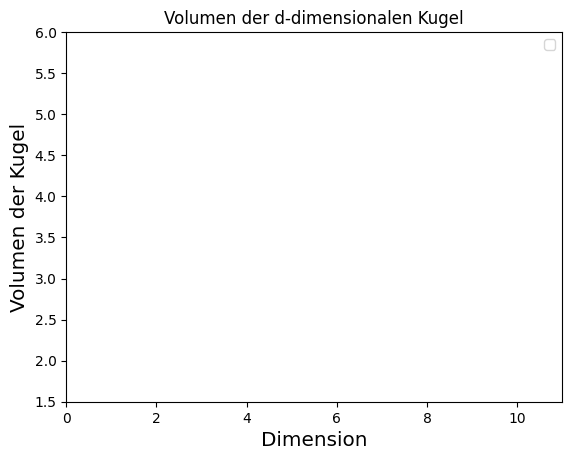

In [5]:
def VofSphere(d, r=1):
    """
      calculate volume of a d-dimensional sphere with radius r

      Args:
        d: dimension
        r: radius

      Returns:
        (array of) float: d-dimensional Volume
    """
    V = r**d * np.pi**(d/2) / sp.gamma(d/2 + 1)
    return V

# Volume from mathematical formula


# plot results (with matplotlib)



plt.xlim(0, dmax+1.)
plt.ylim(1.5, 6.)
plt.xlabel('Dimension', fontsize='x-large')
plt.ylabel('Volumen der Kugel', fontsize='x-large')
plt.legend(loc='best')
plt.title("Volumen der d-dimensionalen Kugel")
plt.show()

---
# Aufgabe 2: Transformationsmethode <a id="Aufgabe2"></a>
---

In der zweiten Aufgaben beschäftigen Sie sich mit der Transformationsmethode. In der ersten Teilaufgabe werden Sie den Zusammenhang zwischen der Verteilung von Zufallszahlen und den dazu gehörigen Wahrscheinlichkeitsdichten vertiefen. Im zweiten Aufgabenteil werden Sie dann selbst korrelierte Zufallszahlen erzeugen, da dies in den üblichen *Python* Bibliotheken nicht zu finden ist, die Notwendigkeit jedoch in der Praxis häufig gegeben ist.

## a) Erzeugung von einfachen Verteilungen
Sie arbeiten mit den gleichverteilten Zufallszahlen $r\in\text{U}_{[0,1[}$. Im Folgenden betrachten Sie zwei Fälle:
* Sie kennen die Verteilung $t_i=t(r_i)$ und sollen die zugrunde liegende Wahrscheinlichsdichte $g(t)$ bestimmen.
* Sie kennen die Wahrscheinlichkeitsdichte $g(t)$ und sollen eine Verteilung $t_i=t(r_i)$ berechnen.

Erzeugen Sie in den folgenden Teilaufgaben immer 10'000 gleichverteilte Zufallszahlen im Intervall $[0,1[$ und bestimmen Sie die fehlende Größe mithilfe der Transformationsmethode. Zeichen Sie anschließend in ein Diagramm die Verteilung $t(r)$ (Histogramm) und die Wahrscheinlichkeitsdichte $g(t(r))$ ein.

### i) Gegeben: $g(t)=\frac{1}{t}$ – Gesucht: $t(r)$ für $t=1\dots 2.75$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


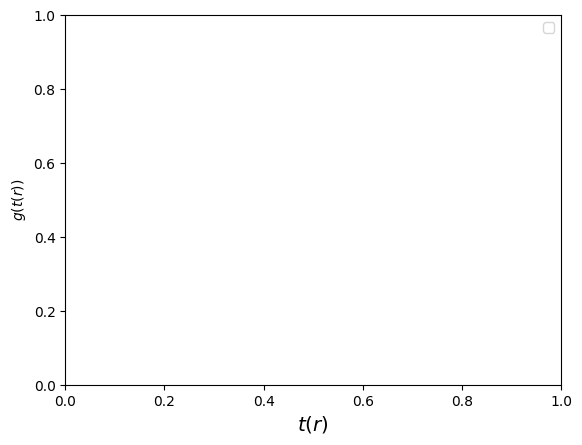

In [6]:
# generate histogramm entries


# compute PDF


# plot histogramm and pdf


# make plot nice
plt.xlabel('$t(r)$', fontsize='x-large')
plt.ylabel('$g(t(r))$')
plt.legend(loc='upper right')

plt.show()

### ii) Gegeben: $t(r)=r^2$ – Gesucht: $g(t)$ für $t=0.01\dots 1$ 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


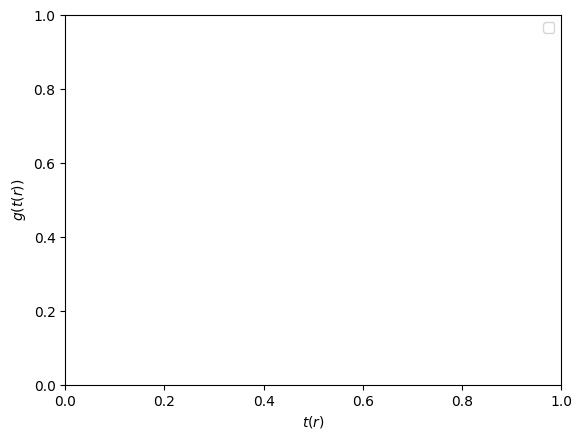

In [7]:
# generate histogramm entries


# compute PDF


# plot histogramm and pdf


# make plot nice
plt.xlabel('$t(r)$')
plt.ylabel('$g(t(r))$')
plt.legend(loc='upper right')

plt.show()

## b) Erzeugung korrelierter, normalverteilter Zufallszahlen
Dieser Aufgabenteil soll Ihnen bewusst machen, wie Sie aus unkorrelierten normalverteilten Zufallszahlen korrelierte Zufallszahlen erzeugen. Die Herleitung des Prinzips wird in der 3. Vorlesung diskutiert und soll hier auf den einfache Fall von zwei
gaußverteilten Zufallszahlen angewandt werden.

Erzeugen Sie zwei Sätze aus 10'000 standard-normalverteilten Zufallszahlen $\vec{u}_{1,2}$ ($\mu_{1,2}=0$ und $\sigma_{1,2}=1$) und transfomieren Sie diese zu korrelierten Zufallszahlen $\vec{x}_{1,2}$ mit einem Korrelationskoeffizienten von $\rho=0.5$.
> Hinweis: Die Methode *np.dot()* kann bei einem Matrix-Vektor Produkt hilfreich sein.

In [8]:
# implement transformation



Stellen Sie nun die beiden Sätze an Zufallszahlen geeignet dar. Es bietet sich an, für jedes Paar jeweils ein zweidimensionales Histogramm zu erstellen. Berechnen Sie anschließend den Korrelationskoeffizienten aus dem neu erzeugten Satz an Zufallszahlen, um Ihr Vorgehen zu überprüfen.
> Hinweis: Das Paket *PhyPraKit* enthält einige hilfreiche Methoden zur Bearbeitung der Aufgabe. 

In [9]:
# plot randomnumbers and calculate correlationcoefficient
import PhyPraKit as ppk


---
# Aufgabe 3: Majoranten-Methode <a id="Aufgabe3"></a>
---

In der letzten Aufgabe kombinieren Sie Ihr erlangtes Wissen aus der Transformations- und der Verwerfungsmethode. Die Kombination aus beiden Methoden wird häufig als Majorantenmethode (*engl.: Importance Sampling*) bezeichnet, welche eine deutlich effizientere Methode zum Erzeugen einer benötigten Verteilung ist.  

Im Folgenden betrachten Sie eine Verteilung, die Ihnen in ähnlicher Form möglicherweise im Fortgeschrittenenpraktikum begegen wird:
$$
f(x)=\sin^2(\pi x)e^{-x}
$$
im Intervall $[0,2\pi]$. 

Dazu erzeugen Sie zunächst mithilfe der Transformationsmethode Zufallszahlen gemäß der Verteilung 
der Majorante und wählen dann mit der Verwerfungsmethode davon eine passende Anzahl aus, um die 
gewünschten Verteilung zu erhalten. 

## a) Transformationsmethode zum Erhalt der Majorante

Erzeugen Sie mithilfe der Transformationsmethode exponentiell verteilte Zufallszahlen als Majorante

$$
m(x)=e^{-x}.
$$

Überzeugen Sie sich zunächst davon, dass Ihre Majorante die gesuchte Verteilung vollständig umschließt, indem Sie die Majorante $m(x)$, die gewünschte Verteilung $f(x)$ und die erzeugten Zufallszahlen histogrammiert in einer Abbildung darstellen.
> Hinweis: Es bietet sich an, die Verteilungen und Verteilungsdichten als Funktion zu implementieren, da Sie sie häufiger aufrufen und gegebenenfalls im Praktikum wiederverwenden werden können.

In [10]:
# build functions f(x), m(x) and PDF of m(x)


# sample majorant


# plot functions and random number



## b) Verwerfungsmethode zum Erhalt der gewünschten Verteilung

Wenden Sie nun die Verwerfungsmethode an, um die gewünschte Verteilung zu erhalten. Erzeugen Sie für jede der Zufallszahlen $x_i$ aus der Majorante eine gleichverteilte Zufalls Zahl $r_i$ aus dem Interval $[0,1]$. Behalten Sie $x_i$ genau dann, wenn die Bedingung
$$
r_i \cdot m(x_i) \leq f(x_i)
$$
erfüllt ist. So erhalten Sie nur die Zufallszahlen, die gemäß f(x) verteilt sind, da Sie für jeden Wert von x nur den Bruchteil 
$$
\frac{m(x)}{f(x)}
$$
der x-Werte behalten. Stellen Sie das Ergebnis, gemäß der vorherigen Teilaufgabe, geeignet dar.
> Tipp: Mithilfe von *plt.hist(\[hist1, hist2\], stacked=True,...)* können Sie sowohl die angenommenen als auch die abgelehnten Zufallszahlen in einem Histogramm darstellen.

In [11]:
# sample 2nd set of random numbers for accept-reject-method


# accept-reject-method


# plot functions and random numbers